# Задание 2. Факторный анализ

Применить факторный анализ для метрических переменных. Оценить вклад первых трех главных компонент Z1 , Z2 , Z3 в общую дисперсию, проинтерпретировать их по факторным нагрузкам, построить двумерные диаграммы 1-2, 1-3, 2-3 факторов, отметить на диаграммах значения порядковой переменной.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Загрузка данных

In [2]:
df = pd.read_csv('data_big.csv', sep = ",", header = 0, index_col = False)
df = df[['sweating.1', 'SBP.1', 'DBP.1', 'MBP.1', 'SV.1', 'CO.1', 'CI.1', 'TPR.1']]

In [3]:
df = df.dropna().reset_index(drop = True)

In [4]:
df.head()

,sweating.1,SBP.1,DBP.1,MBP.1,SV.1,CO.1,CI.1,TPR.1
0,2,116,80,92,74.0,5.3,2.9,1387.0
1,1,144,70,95,168.0,11.4,5.6,663.0
2,1,140,92,108,55.0,5.4,2.8,1598.0
3,0,136,98,11,69.0,3.9,1.8,2292.0
4,1,144,90,108,39.0,3.3,1.7,2592.0


### Факторный анализ

Стандартизируем метрические переменные.

In [5]:
df_1 = df[['SBP.1', 'DBP.1', 'MBP.1', 'SV.1', 'CO.1', 'CI.1', 'TPR.1']]
df_scaled = StandardScaler().fit_transform(df_1)
df_scaled = pd.DataFrame(df_scaled)

Реализация метода главных компонент содержится в классе ```PCA``` 
библиотеки ```sklearn.decomposition```.

In [6]:
pca = PCA(n_components = 3)
pca.fit(df_scaled)

PCA(n_components=3)

Оценим вклад первых трех главных компонент в общую дисперсию.

In [7]:
print(*pca.explained_variance_ratio_)

0.5270833696577619 0.2937592696417445 0.08827671560090011


Факторные нагрузки.

In [8]:
pd.DataFrame(pca.components_, columns = df_1.columns)

,SBP.1,DBP.1,MBP.1,SV.1,CO.1,CI.1,TPR.1
0,0.055209,-0.222417,0.024973,0.460398,0.505284,0.498953,-0.480236
1,0.632680,0.532941,0.532425,-0.055006,0.108793,0.124077,0.044242
2,0.292792,0.454789,-0.800162,0.235545,0.070563,0.000480,0.081975


Значения факторов.

In [9]:
scores = pd.DataFrame(pca.transform(df_scaled), columns = ['Factor 1', 'Factor 2', 'Factor 3'])
scores = pd.concat([scores, df[['sweating.1']]], axis = 1)
scores.head()

,Factor 1,Factor 2,Factor 3,sweating.1
0,0.165782,-1.890485,-0.473520,2
1,5.217857,-0.868861,0.259581,1
2,-0.464040,0.108708,-0.294290,1
3,-1.905945,-2.553623,4.040858,0
4,-2.446917,0.006686,-0.379766,1


Двумерные диаграммы 1-2, 1-3, 2-3 факторов.

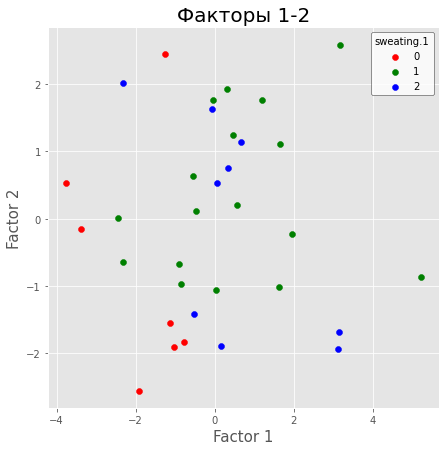

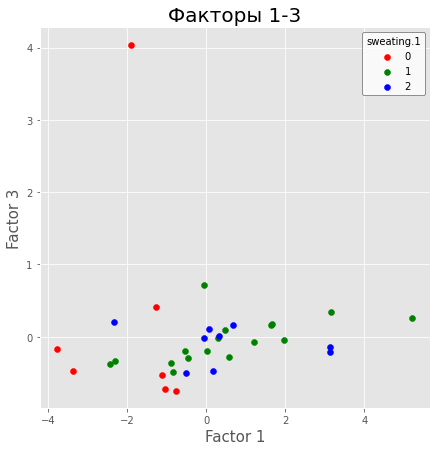

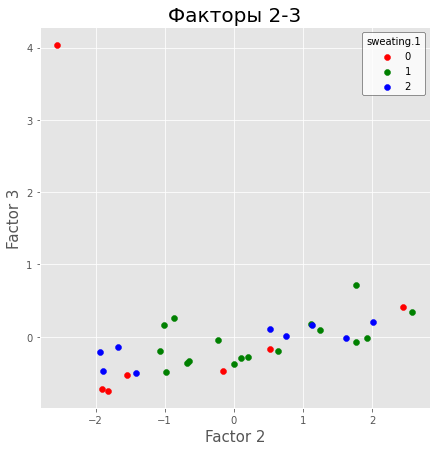

In [10]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('Факторы 1-2', fontsize = 20)
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
for target, color in zip(targets,colors):
    ins = scores['sweating.1'] == target
    ax.scatter(scores.loc[ins, 'Factor 1'], scores.loc[ins, 'Factor 2'], c = color)
ax.legend(targets, title = 'sweating.1', title_fontsize = '10', facecolor = 'white', edgecolor = 'black')
plt.show()

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 3', fontsize = 15)
ax.set_title('Факторы 1-3', fontsize = 20)
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
for target, color in zip(targets,colors):
    ins = scores['sweating.1'] == target
    ax.scatter(scores.loc[ins, 'Factor 1'], scores.loc[ins, 'Factor 3'], c = color)
ax.legend(targets, title = 'sweating.1', title_fontsize = '10', facecolor = 'white', edgecolor = 'black')
plt.show()

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Factor 2', fontsize = 15)
ax.set_ylabel('Factor 3', fontsize = 15)
ax.set_title('Факторы 2-3', fontsize = 20)
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
for target, color in zip(targets,colors):
    ins = scores['sweating.1'] == target
    ax.scatter(scores.loc[ins, 'Factor 2'], scores.loc[ins, 'Factor 3'], c = color)
ax.legend(targets, title = 'sweating.1', title_fontsize = '10', facecolor = 'white', edgecolor = 'black')
plt.show()